# Example Usage

A comparison of a 3 classifiers in `scikit-learn` on iris dataset.
The iris dataset is a classic and very easy multi-class classification dataset.

## Install scikit-learn

`pip install -U scikit-learn`

## Load dataset

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from pycm import ConfusionMatrix
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


## Classifier 1 (C-Support Vector)

In [2]:
from sklearn import svm
classifier_1 = svm.SVC(kernel='linear', C=0.01)

In [3]:
y_pred_1 = classifier_1.fit(X_train, y_train).predict(X_test)

In [4]:
cm1=ConfusionMatrix(y_test,y_pred_1)
cm1.matrix()

Predict          0        1        2        
Actual
0                13       0        0        
1                0        10       6        
2                0        0        9        



In [5]:
cm1.normalized_matrix()

Predict          0              1              2              
Actual
0                1.0            0.0            0.0            
1                0.0            0.625          0.375          
2                0.0            0.0            1.0            



In [6]:
cm1.Kappa 

0.7673469387755101

In [7]:
cm1.Overall_ACC

0.8421052631578947

In [8]:
cm1.SOA1  # Landis and Koch benchmark

'Substantial'

In [9]:
cm1.SOA2  # Fleiss’ benchmark

'Excellent'

In [10]:
cm1.SOA3  # Altman’s benchmark

'Good'

In [11]:
cm1.SOA4  # Cicchetti’s benchmark

'Excellent'

In [12]:
cm1.save_html("cm1")

{'Message': 'D:\\For Asus Laptop\\projects\\pycm\\Document\\cm1.html',
 'Status': True}

[HTML File](cm1.html)

## Classifier 2 (DecisionTree)

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(max_depth=5)

In [14]:
y_pred_2 = classifier_2.fit(X_train, y_train).predict(X_test)

In [15]:
cm2=ConfusionMatrix(y_test,y_pred_2)
cm2.matrix()

Predict          0        1        2        
Actual
0                13       0        0        
1                0        15       1        
2                0        0        9        



In [16]:
cm2.normalized_matrix()

Predict          0              1              2              
Actual
0                1.0            0.0            0.0            
1                0.0            0.9375         0.0625         
2                0.0            0.0            1.0            



In [17]:
cm2.Kappa 

0.95978835978836

In [18]:
cm2.Overall_ACC

0.9736842105263158

In [19]:
cm2.SOA1  # Landis and Koch benchmark

'Almost Perfect'

In [20]:
cm2.SOA2  # Fleiss’ benchmark

'Excellent'

In [21]:
cm2.SOA3  # Altman’s benchmark

'Very Good'

In [22]:
cm2.SOA4  # Cicchetti’s benchmark

'Excellent'

In [23]:
cm2.save_html("cm2")

{'Message': 'D:\\For Asus Laptop\\projects\\pycm\\Document\\cm2.html',
 'Status': True}

[HTML File](cm2.html)

## Classifier 3 (AdaBoost)

In [24]:
from sklearn.ensemble import AdaBoostClassifier
classifier_3 = AdaBoostClassifier()

In [25]:
y_pred_3 = classifier_3.fit(X_train, y_train).predict(X_test)

In [26]:
cm3=ConfusionMatrix(y_test,y_pred_3)
cm3.matrix()

Predict          0        1        2        
Actual
0                13       0        0        
1                0        15       1        
2                0        3        6        



In [27]:
cm3.normalized_matrix()

Predict          0              1              2              
Actual
0                1.0            0.0            0.0            
1                0.0            0.9375         0.0625         
2                0.0            0.33333        0.66667        



In [28]:
cm3.Kappa 

0.8354978354978355

In [29]:
cm3.Overall_ACC

0.8947368421052632

In [30]:
cm3.SOA1  # Landis and Koch benchmark

'Almost Perfect'

In [31]:
cm3.SOA2  # Fleiss’ benchmark

'Excellent'

In [32]:
cm3.SOA3  # Altman’s benchmark

'Very Good'

In [33]:
cm3.SOA4  # Cicchetti’s benchmark

'Excellent'

In [34]:
cm3.save_html("cm3")

{'Message': 'D:\\For Asus Laptop\\projects\\pycm\\Document\\cm3.html',
 'Status': True}

[HTML File](cm3.html)

## How to compare classifiers?

Classifiers can be compared with each other according to results of the benchmarks.
The second classifier (DecisionTree) is the best one in this case. PYCM supports different useful parameters such as `Kappa value`, `Scott's pi`, `Entropy`, to name but a handful.

## Plotting with matplotlib

`pip install matplotlib`

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function modified to plots the ConfusionMatrix object.
    Normalization can be applied by setting `normalize=True`.
    
    Code Reference : 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    """

    plt_cm = []
    for i in cm.classes :
        row=[]
        for j in cm.classes:
            row.append(cm.table[i][j])
        plt_cm.append(row)
    plt_cm = np.array(plt_cm)
    if normalize:
        plt_cm = plt_cm.astype('float') / plt_cm.sum(axis=1)[:, np.newaxis]     
    plt.imshow(plt_cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(cm.classes))
    plt.xticks(tick_marks, cm.classes, rotation=45)
    plt.yticks(tick_marks, cm.classes)

    fmt = '.2f' if normalize else 'd'
    thresh = plt_cm.max() / 2.
    for i, j in itertools.product(range(plt_cm.shape[0]), range(plt_cm.shape[1])):
        plt.text(j, i, format(plt_cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if plt_cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predict')

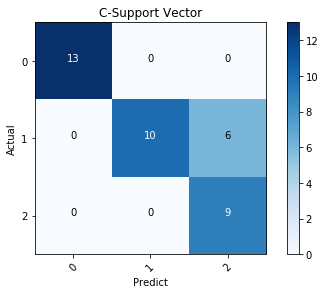

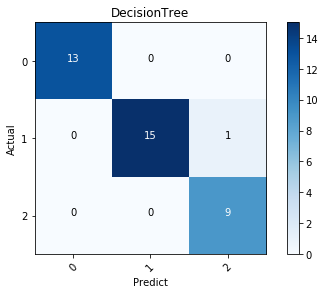

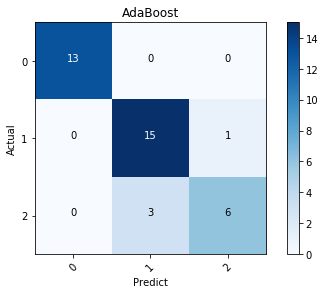

In [36]:
plt.figure()
plot_confusion_matrix(cm1,title='C-Support Vector')
plt.figure()
plot_confusion_matrix(cm2,title='DecisionTree')
plt.figure()
plot_confusion_matrix(cm3,title='AdaBoost')
plt.show()